In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df_fire = pd.read_csv('df_alpha.csv')
df_fire.shape

(155468, 23)

In [9]:
df_fire.columns

Index(['yrbuilt', 'from_st', 'total_uses', 'shape_area', 'cie', 'landuse',
       'mips', 'mapblklot', 'objectid', 'shape_leng', 'visitor', 'st_type',
       'bldgsqft', 'resunits', 'pdr', 'street', 'retail', 'to_st', 'block_num',
       'blklot', 'lot_num', 'med', 'fire_count'],
      dtype='object')

Land use categories for every parcel in San Francisco. The land use categories are derived from a range of City and commercial databases. Where building square footages were missing from these databases they were derived from a LIDAR survey flown in 2007.

Land use categories are as follows (units are square feet):

CIE = Cultural, Institutional, Educational
MED = Medical
MIPS = Office (Management, Information, Professional Services)
MIXED = Mixed Uses (Without Residential)
MIXRES = Mixed Uses (With Residential)
PDR = Industrial (Production, Distribution, Repair)
RETAIL/ENT = Retail, Entertainment
RESIDENT = Residential
VISITOR = Hotels, Visitor Services
VACANT = Vacant
ROW = Right-of-Way
OPENSPACE = Open Space

Other attributes are:
RESUNITS = Residential Units
BLDGSQFT = Square footage data
YRBUILT = year built
TOTAL_USES = Business points from Dun & Bradstreet were spatially aggregated to the closest parcel, and this field is the sum of the square footage fields
The subsequent fields (CIE, MED, MIPS, RETAIL, PDER & VISITOR) were derived using the NAICS codes supplied in the Dun & Bradstreet dataset, and the previous TOTAL_USES column.

The determining factor for a parcel's LANDUSE is if the square footage of any non-residential use is 80% or more of its total uses. Otherwise it becomes MIXED.

In the case where RESIDENT use has some square footage of non-residential use, this is mainly accessory uses such as home businesses, freelancers, etc.

In [10]:
df_fire.head()

,yrbuilt,from_st,total_uses,shape_area,cie,landuse,mips,mapblklot,objectid,shape_leng,...,resunits,pdr,street,retail,to_st,block_num,blklot,lot_num,med,fire_count
0,1912,838.0,0,3864.061762,0,RESIDENT,0,0026013,1,327.786363,...,5,0,BAY,0,842.0,0026,0026013,013,0,2.0
1,1900,844.0,3471,3361.025351,0,MIXRES,3471,0026014,2,320.352522,...,1,0,BAY,0,844.0,0026,0026014,014,0,NaN
2,1900,848.0,0,3272.033196,0,RESIDENT,0,0026015,3,319.046088,...,2,0,BAY,0,850.0,0026,0026015,015,0,4.0
3,1940,860.0,0,4570.767667,0,RESIDENT,0,0026016,4,279.353002,...,2,0,BAY,0,862.0,0026,0026016,016,0,NaN
4,1938,870.0,0,5225.823735,0,RESIDENT,0,0026017,5,294.354339,...,2,0,BAY,0,872.0,0026,0026017,017,0,NaN


In [11]:
df_fire['fire_count'].describe()

count    28421.000000
mean         5.253334
std         34.245237
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2854.000000
Name: fire_count, dtype: float64

In [12]:
# year_built
df_fire['yrbuilt'].describe()

count    155468.000000
mean       1833.649285
std         429.116954
min           0.000000
25%        1909.000000
50%        1926.000000
75%        1947.000000
max        8687.000000
Name: yrbuilt, dtype: float64

In [13]:
df_fire['landuse'].unique()
#the idea is that use 'landuse' to create dummy variables.

array(['RESIDENT', 'MIXRES', 'VACANT', 'PDR', 'OpenSpace', 'VISITOR',
       'MIPS', 'MIXED', 'RETAIL/ENT', 'CIE', 'MISSING DATA', 'MED',
       'Right of Way'], dtype=object)

In [14]:
df_fire['total_uses'].nunique()

7683

In [15]:
# a few land use variable: these are only this parcel's infomation, using Dun & Bradstreet data
# all are sqft

In [16]:
# total sqft usage
df_fire['total_uses'].describe()

count    1.554680e+05
mean     1.530632e+03
std      1.281829e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.576124e+06
Name: total_uses, dtype: float64

In [17]:
# total point of interest in cultual, institution, education
df_fire['cie'].describe()

count    155468.000000
mean        192.312978
std        2409.452327
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      398149.000000
Name: cie, dtype: float64

In [18]:
# total point of interest in medical
df_fire['med'].describe()

count    155468.000000
mean        112.357778
std        2954.385480
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      649787.000000
Name: med, dtype: float64

In [19]:
# total point of interest in office, management, information, professional
df_fire['mips'].describe()

count    155468.000000
mean        694.541346
std        8892.824073
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      932807.000000
Name: mips, dtype: float64

In [20]:
# total point of interest in retail
df_fire['retail'].describe()

count    155468.000000
mean        272.078666
std        2272.992865
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      387013.000000
Name: retail, dtype: float64

In [21]:
# total point of interest in industrial, production, repair
df_fire['pdr'].describe()

count    155468.000000
mean        233.268788
std        2071.359310
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      373344.000000
Name: pdr, dtype: float64

In [22]:
# total point of interest in hotel
df_fire['visitor'].describe()

count    155468.000000
mean         26.072388
std         673.809750
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       66063.000000
Name: visitor, dtype: float64

In [23]:
# total residential units: only one not in sqft
df_fire['resunits'].describe()

count    155468.000000
mean          2.329605
std          10.485015
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         720.000000
Name: resunits, dtype: float64

In [24]:
# building sqft total
df_fire['bldgsqft'].describe()

count    1.554680e+05
mean     3.467095e+03
std      2.033387e+04
min      0.000000e+00
25%      1.173000e+03
50%      1.641000e+03
75%      2.625000e+03
max      3.015837e+06
Name: bldgsqft, dtype: float64

# data analysis

In [25]:
df_fire.columns

Index(['yrbuilt', 'from_st', 'total_uses', 'shape_area', 'cie', 'landuse',
       'mips', 'mapblklot', 'objectid', 'shape_leng', 'visitor', 'st_type',
       'bldgsqft', 'resunits', 'pdr', 'street', 'retail', 'to_st', 'block_num',
       'blklot', 'lot_num', 'med', 'fire_count'],
      dtype='object')

In [26]:
cols_to_use = ['fire_count','bldgsqft','total_uses','cie','mips','visitor', 'pdr', 'retail', 'to_st','med','resunits']

x_cols = cols_to_use[1:]
y_col = 'fire_count'

print('Y variable:',y_col)
print('Using {} covariates'.format(len(x_cols)))

df = df_fire[cols_to_use]

Y variable: fire_count
Using 10 covariates


In [27]:
import math


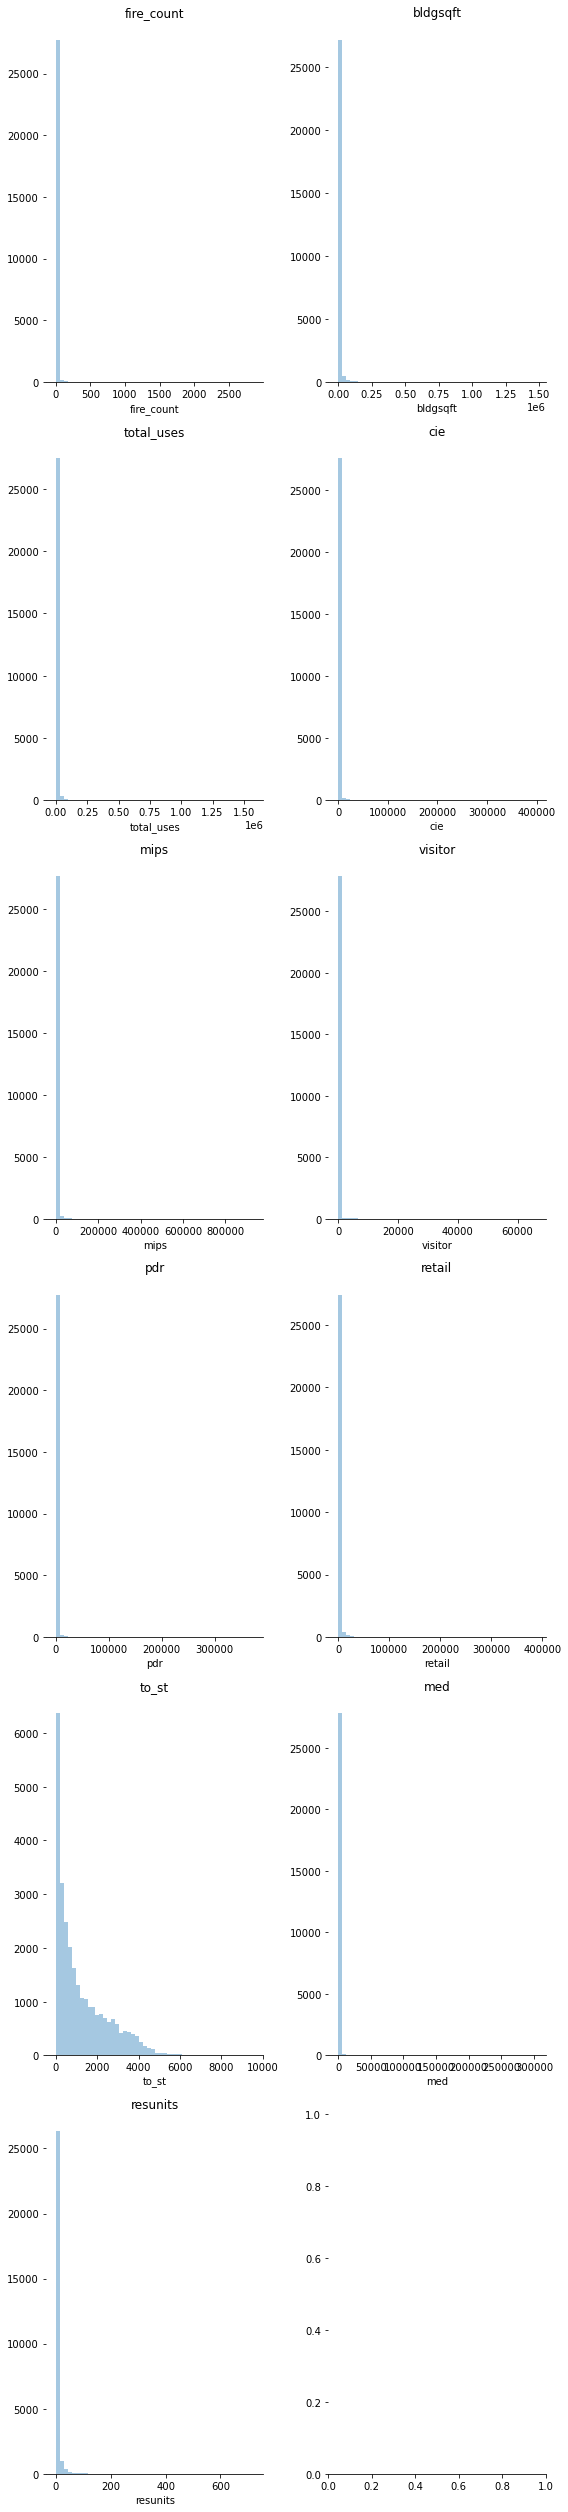

In [31]:
df_notnull = df.dropna(how='any')
plot_rows = math.ceil(len(cols_to_use)/2)

f, axes = plt.subplots(plot_rows,2, figsize=(8,35))
sns.despine(left=True)

for i,col in enumerate(cols_to_use):
    row_position = math.floor(i/2)
    col_position = i%2
    sns.distplot(df_notnull[col], ax=axes[row_position, col_position],kde=False)
    axes[row_position, col_position].set_title('{}'.format(col)) 

plt.tight_layout()
plt.show()

In [25]:
sns.distplot(df['fire_count'])

C:\Users\Ruoying\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fire_count', ylabel='Density'>

In [28]:
from sklearn import linear_model, model_selection
from sklearn.metrics import r2_score

In [32]:
df_X = df_notnull[x_cols]
df_y = df_notnull['fire_count']
# split into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_X,df_y, test_size = .3)

# fit the model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble.partial_dependence import plot_partial_dependence
#from sklearn.ensemble.partial_dependence import partial_dependence

In [33]:
def RMSE(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

def cross_val_gb(X,y,cv_method='kfold',k=5, **params):
    """Estimate gradient boosting regressor using cross validation and return RMSE.
    
    Args: 
        X (DataFrame): features data
        y (Series): target data
        cv_method (str): how to split the data ('kfold' (default) or 'timeseries')
        k (int): number of folds (default=5)
        **params: keyword arguments for regressor
    Returns: 
        float: mean error (RMSE) across all training/test sets.
    """
    if cv_method == 'kfold':
        kf = KFold(n_splits=k, shuffle=True, random_state=2012016)  # use random seed for reproducibility. 
    
    E = np.ones(k)   # this array will hold the errors. 
    i=0
    for train, test in kf.split(X, y): 
        train_data_x = X.iloc[train]
        train_data_y = y.iloc[train]    
        test_data_x = X.iloc[test]
        test_data_y = y.iloc[test]

        # n_estimators is number of trees to build. 
        grad_boost = GradientBoostingRegressor(loss='ls',criterion='mse', **params)
        grad_boost.fit(train_data_x,train_data_y)
        predict_y=grad_boost.predict(test_data_x)
        E[i] = RMSE(test_data_y, predict_y)
        i+=1
    return np.mean(E)

In [34]:
# find best model using different parameter
param_grid = {'learning_rate':[.5,.2,.1],
              'max_depth':[12,16,18],
              'min_samples_leaf': [17,25],
              'max_features': [.3]
              }

est= GradientBoostingRegressor(n_estimators = 100)
gs_cv = GridSearchCV(est,param_grid).fit(df_X,df_y)

print(gs_cv.best_params_)
print(gs_cv.best_score_)

{'learning_rate': 0.1, 'max_depth': 18, 'max_features': 0.3, 'min_samples_leaf': 25}
-0.08570343548997564


In [35]:
# best parameters
params = {'n_estimators':500,
          'learning_rate':0.1,
          'max_depth':16,
          'min_samples_leaf':17,
          'max_features':0.3
          }
          
grad_boost = GradientBoostingRegressor(loss='ls',criterion='mse', **params)
grad_boost.fit(df_X,df_y)

GradientBoostingRegressor(criterion='mse', max_depth=16, max_features=0.3,
                          min_samples_leaf=17, n_estimators=500)

In [38]:
# model evaluation
error_gb = cross_val_gb(df_X,df_y, cv_method='kfold',k=5, **params)

In [41]:
# how "well" does the model do? 

print(error_gb)

30.841372414945248


In [ ]:
# plot the importances (Relative influence of each variable)
gb_o = pd.DataFrame({'features':x_cols,'importance':grad_boost.feature_importances_})
gb_o= gb_o.sort_values(by='importance',ascending=False)


plt.figure(1,figsize=(12, 6))
plt.xticks(range(len(gb_o)), gb_o.features,rotation=45)
plt.plot(range(len(gb_o)),gb_o.importance,"o")
plt.title('Feature importances')
plt.show()

In [ ]:
features = [0,1,2,3,4,5,6,9,14,31,10]
names = df_X.columns
fig, axs = plot_partial_dependence(grad_boost, df_X, features,feature_names=names, grid_resolution=50, figsize = (10,10))
fig.suptitle('Partial dependence of rental price features')
plt.subplots_adjust(top=0.9)  

plt.show()

In [ ]:
# error analysis
y_pred = grad_boost.predict(df_X)
# plot predicted vs. actual

plt.scatter(y_pred,df_y, color='blue',s=1, alpha=.5)
plt.show()

In [ ]:
# plot errors vs. predicted
plt.scatter(y_pred, y_pred-df_y, color='blue',s=1,alpha=.5 )
plt.show()

In [ ]:
# plot on the map
from matplotlib.colors import Normalize
# map the errors. 
x = df_X['lng']
y = df_X['lat']
z = y_pred-df_y

norm = Normalize(vmin=-1,vmax=1)  # zoom in on middle of error range

plt.figure(figsize=(6,9))
plt.scatter(x,y, c=z, cmap='jet',s=1,alpha=0.1,edgecolors='face', norm=norm)
#plt.xlim(-122.6,-122)
#plt.ylim(37.6,38)
plt.colorbar()
plt.show()